In [1]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from src.main import main
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
opt = {
    "img_size" : (3, 32, 32),
    "lr" : 0.00005, 
    "beta1" : .5, 
    "beta2" : .99, 
    "batch_size" : 16, 
    "dim" : 32, 
    "latent_dim" : 100, 
    "device" : "cuda:0" if torch.cuda.is_available else "cpu", 
    "num_epochs" : 1400, 
    "cuda" : True,
    "clip_val" : 0.01, 
    "n_critic" : 5,
    "mode" : "normal", 
    "img_plot_periodicity" : 100, 
    "dataset_type" : "cifar10"
}

Files already downloaded and verified


Epoch 1/1400: 100%|███████████████████████████████████████████████| 313/313 [00:04<00:00, 73.80it/s]


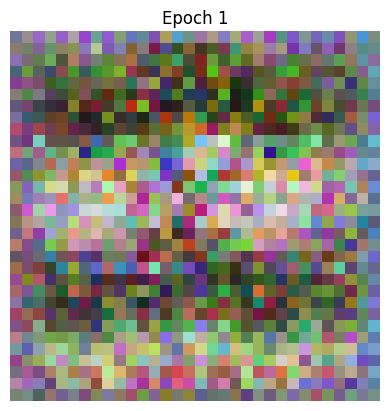

Avg Loss_D: 1.3185	Avg Loss_G: 0.7449	G gradient norm: 3.4453	D gradient norm: 4.5168


Epoch 100/1400: 100%|█████████████████████████████████████████████| 313/313 [00:03<00:00, 86.83it/s]


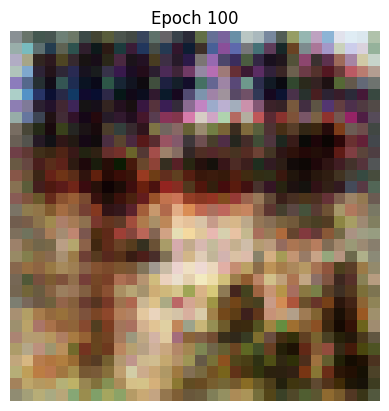

Avg Loss_D: 1.3812	Avg Loss_G: 0.6917	G gradient norm: 0.2836	D gradient norm: 1.3148


Epoch 200/1400: 100%|█████████████████████████████████████████████| 313/313 [00:03<00:00, 81.98it/s]


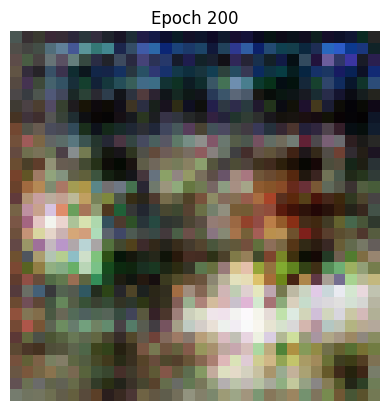

Avg Loss_D: 1.3819	Avg Loss_G: 0.6912	G gradient norm: 0.2745	D gradient norm: 0.8639


Epoch 300/1400: 100%|█████████████████████████████████████████████| 313/313 [00:04<00:00, 65.30it/s]


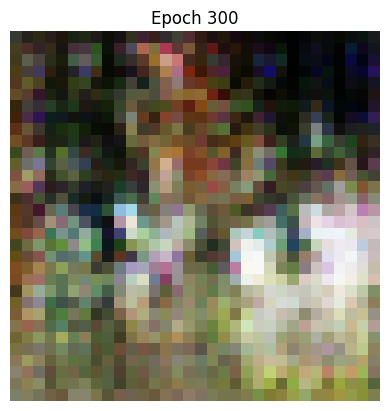

Avg Loss_D: 1.3819	Avg Loss_G: 0.6908	G gradient norm: 0.0004	D gradient norm: 0.0044


Epoch 400/1400: 100%|█████████████████████████████████████████████| 313/313 [00:03<00:00, 81.05it/s]


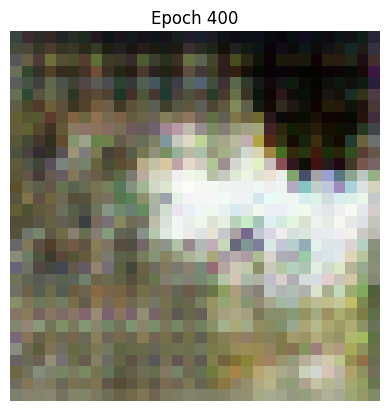

Avg Loss_D: 1.3820	Avg Loss_G: 0.6911	G gradient norm: 0.0000	D gradient norm: 0.0006


Epoch 500/1400: 100%|█████████████████████████████████████████████| 313/313 [00:03<00:00, 85.99it/s]


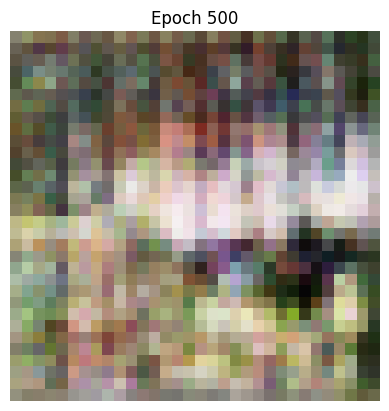

Avg Loss_D: 1.3818	Avg Loss_G: 0.6915	G gradient norm: 0.1414	D gradient norm: 1.0945


Epoch 600/1400: 100%|█████████████████████████████████████████████| 313/313 [00:03<00:00, 87.30it/s]


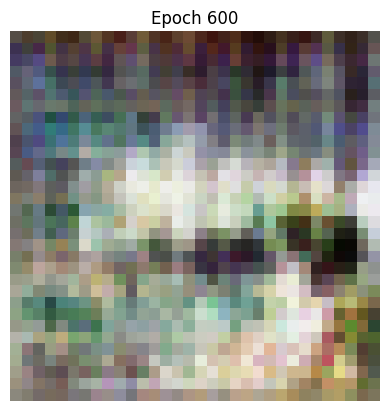

Avg Loss_D: 1.3815	Avg Loss_G: 0.6916	G gradient norm: 0.2298	D gradient norm: 1.5353


Epoch 700/1400: 100%|█████████████████████████████████████████████| 313/313 [00:03<00:00, 85.77it/s]


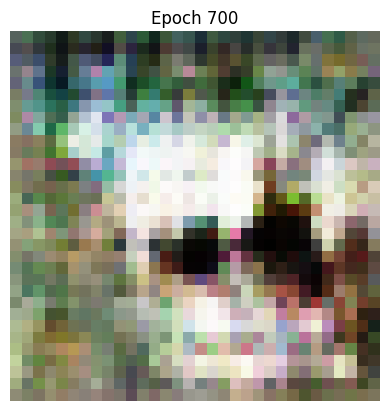

Avg Loss_D: 1.3813	Avg Loss_G: 0.6916	G gradient norm: 0.0966	D gradient norm: 0.7953


Epoch 800/1400: 100%|█████████████████████████████████████████████| 313/313 [00:03<00:00, 84.53it/s]


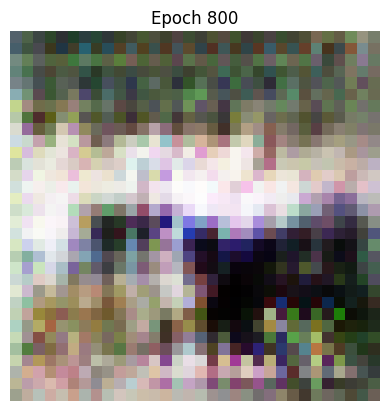

Avg Loss_D: 1.3815	Avg Loss_G: 0.6927	G gradient norm: 0.9921	D gradient norm: 3.8642


Epoch 900/1400: 100%|█████████████████████████████████████████████| 313/313 [00:04<00:00, 67.73it/s]


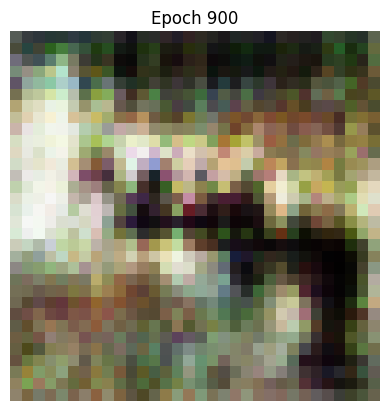

Avg Loss_D: 1.3815	Avg Loss_G: 0.6926	G gradient norm: 0.6064	D gradient norm: 1.5329


Epoch 1000/1400: 100%|████████████████████████████████████████████| 313/313 [00:03<00:00, 97.20it/s]


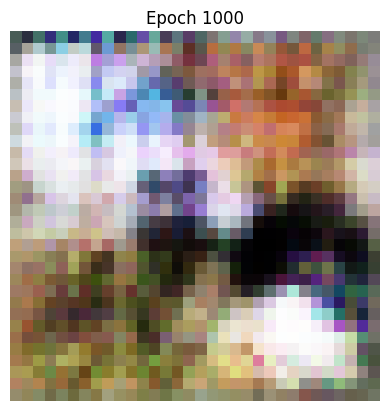

Avg Loss_D: 1.3818	Avg Loss_G: 0.6911	G gradient norm: 0.2279	D gradient norm: 0.5258


Epoch 1100/1400: 100%|████████████████████████████████████████████| 313/313 [00:04<00:00, 65.62it/s]


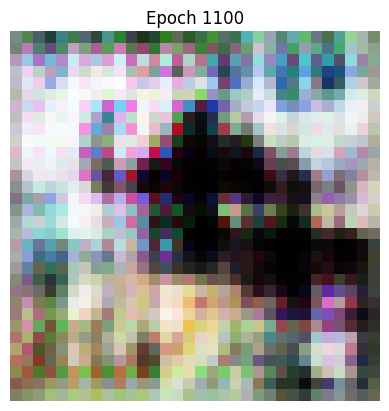

Avg Loss_D: 1.3819	Avg Loss_G: 0.6909	G gradient norm: 0.4217	D gradient norm: 1.8902


Epoch 1200/1400: 100%|████████████████████████████████████████████| 313/313 [00:04<00:00, 70.32it/s]


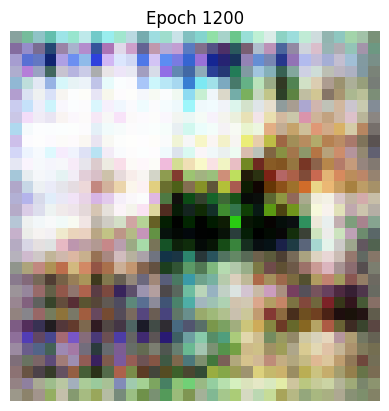

Avg Loss_D: 1.3815	Avg Loss_G: 0.6917	G gradient norm: 0.2818	D gradient norm: 1.1763


Epoch 1300/1400: 100%|████████████████████████████████████████████| 313/313 [00:05<00:00, 56.15it/s]


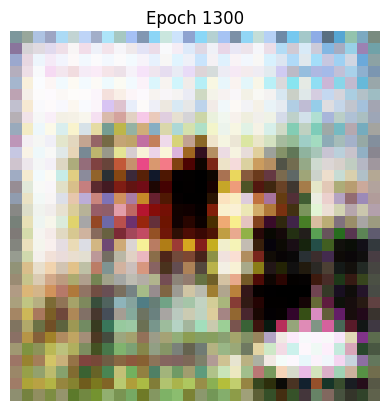

Avg Loss_D: 1.3819	Avg Loss_G: 0.6909	G gradient norm: 0.0000	D gradient norm: 0.0005


Epoch 1400/1400: 100%|████████████████████████████████████████████| 313/313 [00:04<00:00, 66.05it/s]


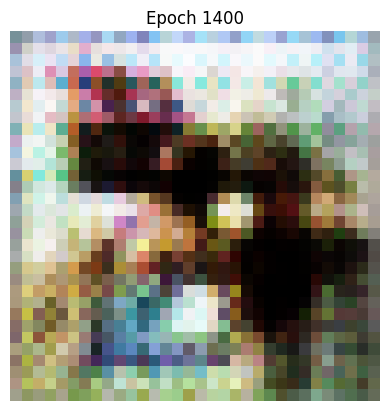

Avg Loss_D: 1.3819	Avg Loss_G: 0.6909	G gradient norm: 0.0000	D gradient norm: 0.0000
Models saved: Generator -> ../trained_models/DCGANgenerator_epoch1400.pth, Discriminator -> ../trained_models/DCGANdiscriminator_epoch1400.pth


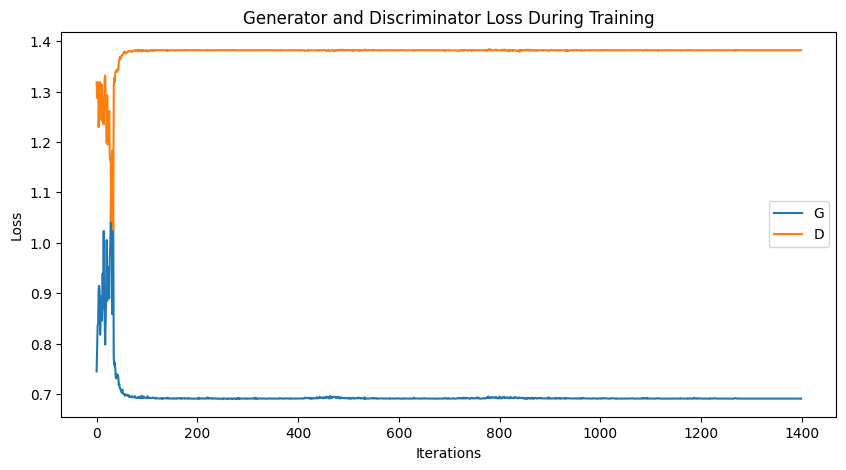

In [3]:
G_losses, D_losses, G_grad_loss, D_grad_loss = main(opt)

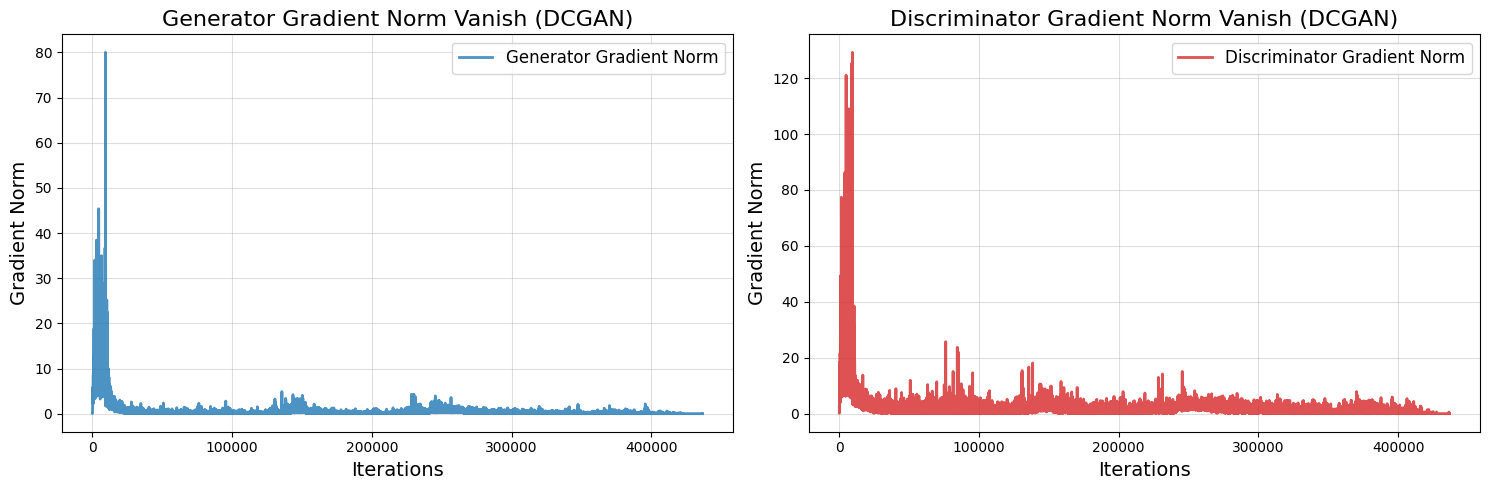

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
axes = ax.flatten()

# Tracer les courbes avec des couleurs optimisées et une transparence visible
axes[0].plot(G_grad_loss, label="Generator Gradient Norm", color="#1f77b4", alpha=0.8, linewidth=2)  # Bleu foncé
axes[1].plot(D_grad_loss, label="Discriminator Gradient Norm", color="#d62728", alpha=0.8, linewidth=2)  # Rouge vif

# Ajouter des titres et des labels à chaque subplot
axes[0].set_title("Generator Gradient Norm Vanish (DCGAN)", fontsize=16)
axes[1].set_title("Discriminator Gradient Norm Vanish (DCGAN)", fontsize=16)

for i, ax in enumerate(axes):
    ax.set_xlabel("Iterations", fontsize=14)
    ax.set_ylabel("Gradient Norm", fontsize=14)
    ax.legend(fontsize=12)
    ax.grid(alpha=0.4)

# Ajuster l'espace entre les subplots
plt.tight_layout()

# Afficher le graphique
plt.show()

In [10]:
fig.savefig("gradient_norms_DCGAN_CIFAR10horse_epochs1400_bs16_lr000005.png", dpi=300, bbox_inches="tight") 

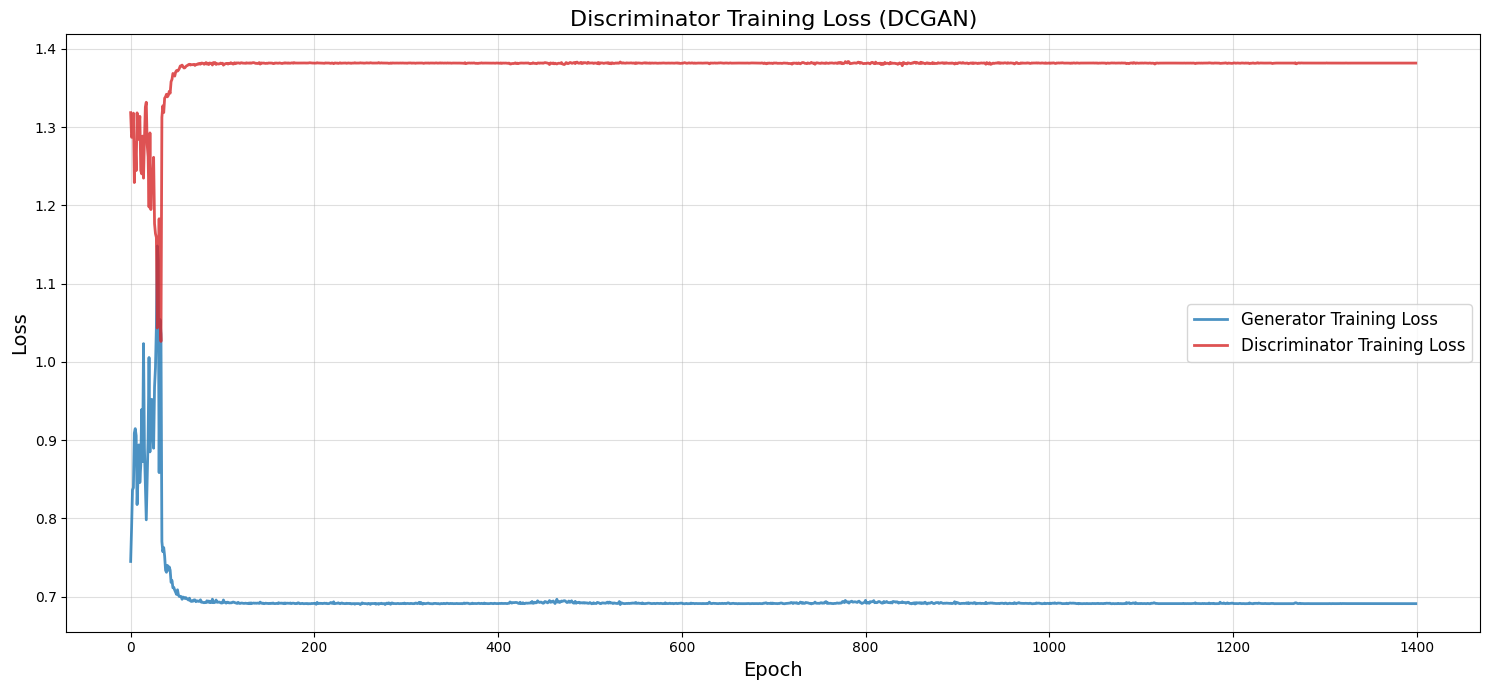

In [14]:
fig1, ax = plt.subplots(figsize=(15, 7))

# Tracer les courbes avec des couleurs optimisées et une transparence visible
ax.plot(G_losses, label="Generator Training Loss", color="#1f77b4", alpha=0.8, linewidth=2)  # Bleu foncé
ax.plot(D_losses, label="Discriminator Training Loss", color="#d62728", alpha=0.8, linewidth=2)  # Rouge vif

# Ajouter des titres et des labels à chaque subplot
ax.set_title("Generator Training Loss (DCGAN)", fontsize=16)
ax.set_title("Discriminator Training Loss (DCGAN)", fontsize=16)

ax.set_xlabel("Epoch", fontsize=14)
ax.set_ylabel("Loss", fontsize=14)
ax.legend(fontsize=12)
ax.grid(alpha=0.4)

# Ajuster l'espace entre les subplots
plt.tight_layout()

# Afficher le graphique
plt.show()

In [15]:
fig1.savefig("training_loss_DCGAN_CIFAR10horse_epochs1400_bs16_lr000005.png", dpi=300, bbox_inches="tight") 

In [17]:
from torchvision import datasets, transforms
from torch.utils.data import Subset

Files already downloaded and verified


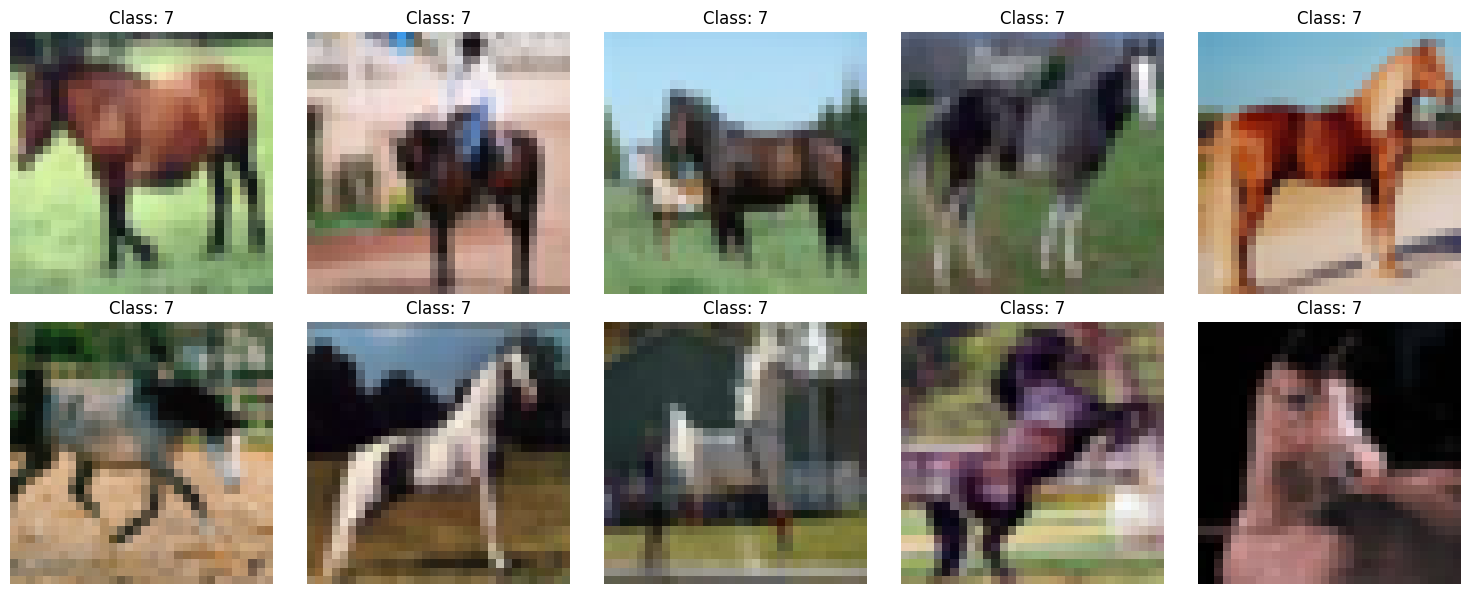

In [21]:
# Transform to tensor (since CIFAR-10 images are PIL images)
transform = transforms.Compose([transforms.ToTensor()])

# Define the class index for "horse" (CIFAR-10 class 7)
horse_class_index = 7
cifar10_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# Get the indices of all "horse" class images
horse_indices = [i for i, (_, label) in enumerate(cifar10_dataset) if label == horse_class_index]

# Create a subset dataset for the "horse" class
train_dataset = Subset(cifar10_dataset, horse_indices)

# Number of images to display
num_images_to_show = 10  # Displaying 10 images in total

# Create a plot (2 rows, 5 columns)
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# Loop through the images in the subset dataset
for i in range(num_images_to_show):
    img, label = train_dataset[i]
    ax = axes[i // 5, i % 5]  # Calculate position in the 2x5 grid
    ax.imshow(img.permute(1, 2, 0))  # Convert from (C, H, W) to (H, W, C)
    ax.set_title(f'Class: {label}')
    ax.axis('off')  # Hide axes

plt.tight_layout()
plt.show()

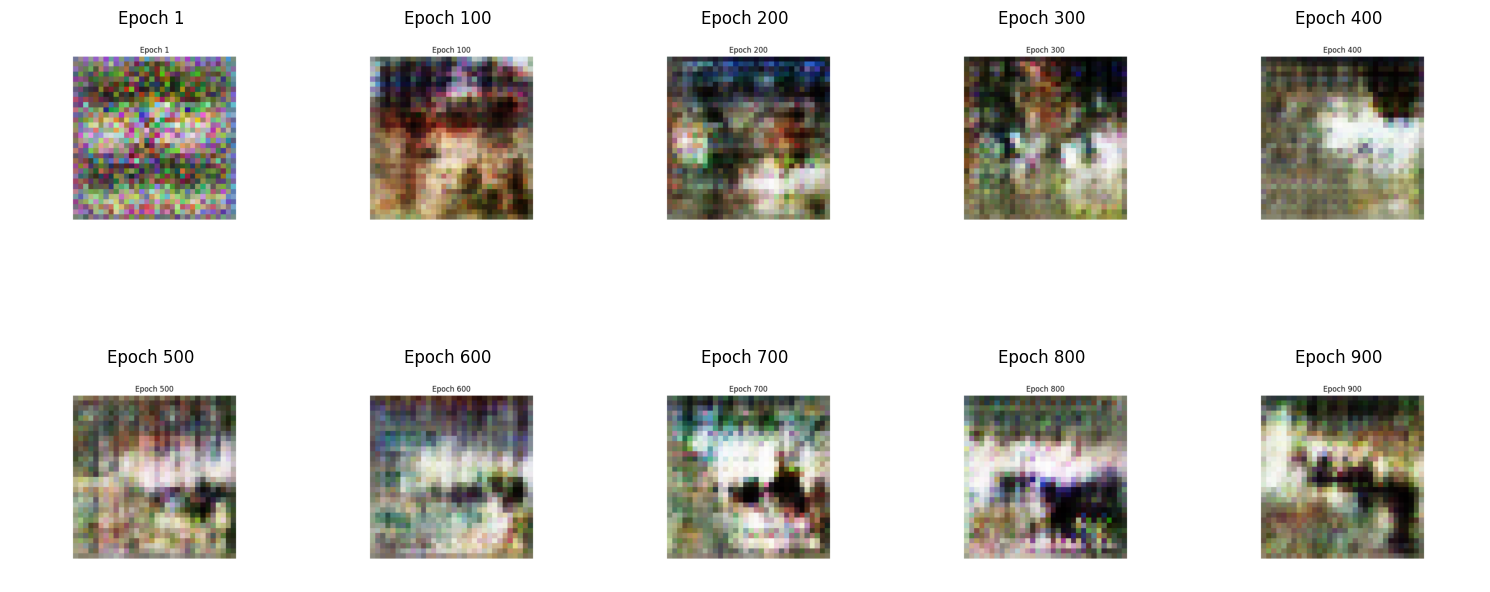

In [28]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# List of epochs for which you have generated images
epochs = [1, 100, 200, 300, 400, 500, 600, 700, 800, 900]

# Directory containing the images
image_dir = './generated_images'  # Change this path to your directory

# Create a 3x5 grid for the images
fig, axes = plt.subplots(2, 5, figsize=(15, 8))

# Flatten the axes array to easily iterate over
axes = axes.flatten()

# Loop through each epoch and corresponding axis to plot the images
for i, epoch in enumerate(epochs):
    img_path = os.path.join(os.getcwd(), f'generated_image_epoch_{epoch}.png')
    img = mpimg.imread(img_path)
    
    axes[i].imshow(img)
    axes[i].axis('off')  # Remove axis for a cleaner look
    axes[i].set_title(f'Epoch {epoch}')

# Adjust layout to prevent overlap and display the plot
plt.tight_layout()
plt.show()